This notebook is for exploratory data analysis of the data in the paribas kaggle competition. Watch this space!

In [1]:
#Import libraries:
import numpy as np
import pandas as pd
import xgboost as xgb
import time
#load data:
train = pd.read_csv("train.csv")
target = train['target']
train = train.drop(['ID','target'],axis=1)
test = pd.read_csv("test.csv")
ids = test['ID'].values
test = test.drop(['ID'],axis=1)

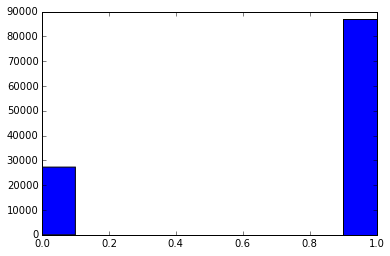

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist( target)
plt.show()

There's a class imbalance! Make sure that your k-fold CV is stratified downstream!

Next up: check out predictor variables: missing values, features with near-zero variance, correlated predictors, distributions of numerical features ...